# Custom OCR - training the neural network



# Importing the libraries

In [4]:
import tensorflow
tensorflow.__version__


'2.20.0'

In [5]:
import numpy as np
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Loading the datasets

## MNIST 0-9

In [6]:
from tensorflow.keras.datasets import mnist

In [7]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

In [8]:
train_data.shape, test_data.shape

((60000, 28, 28), (10000, 28, 28))

In [9]:
28 * 28

784

In [10]:
train_labels.shape, test_labels.shape

((60000,), (10000,))

In [11]:
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [12]:
train_data[0].shape

(28, 28)

In [13]:
train_labels[0]

5

In [14]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [15]:
digits_data = np.vstack([train_data, test_data])
digits_labels = np.hstack([train_labels, test_labels])

In [16]:
digits_data.shape

(70000, 28, 28)

In [17]:
digits_labels.shape

(70000,)

In [18]:
np.random.randint(0, digits_data.shape[0])

11029

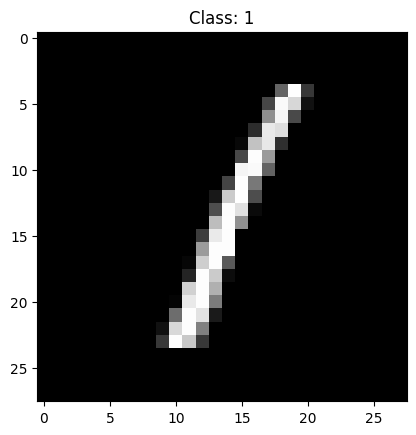

In [19]:
index = np.random.randint(0, digits_data.shape[0])
plt.imshow(digits_data[index], cmap='gray')
plt.title('Class: ' + str(digits_labels[index]));

<Axes: ylabel='count'>

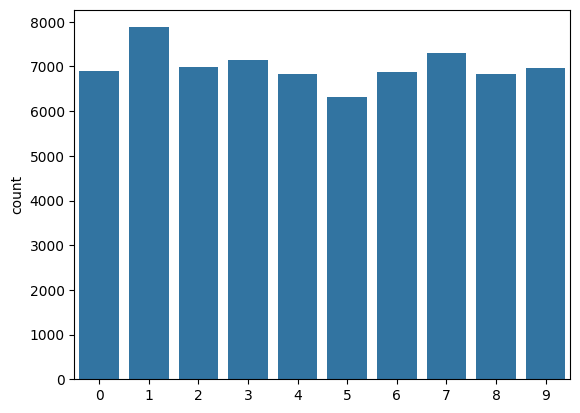

In [20]:
# sns.countplot(digits_labels);
sns.countplot(x=digits_labels)

## Kaggle A-Z

In [21]:
# !wget https://iaexpert.academy/arquivos/alfabeto_A-Z.zip

In [22]:
# zip_object = zipfile.ZipFile(file = 'alfabeto_A-Z.zip', mode = 'r')
# zip_object.extractall('./')
# zip_object.close()

In [23]:
dataset_az = pd.read_csv('A_Z Handwritten Data.csv').astype('float32')
dataset_az

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372446,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372447,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372448,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
alphabet_data = dataset_az.drop('0', axis = 1)
alphabet_labels = dataset_az['0']

In [25]:
alphabet_data.shape, alphabet_labels.shape

((372450, 784), (372450,))

In [26]:
alphabet_labels

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
372445    25.0
372446    25.0
372447    25.0
372448    25.0
372449    25.0
Name: 0, Length: 372450, dtype: float32

In [27]:
alphabet_data = np.reshape(alphabet_data.values, (alphabet_data.shape[0], 28, 28))

In [28]:
alphabet_data.shape

(372450, 28, 28)

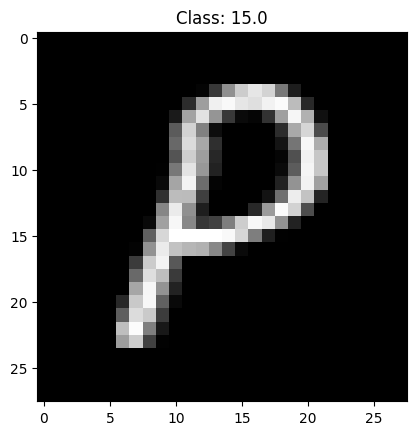

In [29]:
index = np.random.randint(0, alphabet_data.shape[0])
plt.imshow(alphabet_data[index], cmap = 'gray')
plt.title('Class: ' + str(alphabet_labels[index]));

<Axes: xlabel='0', ylabel='count'>

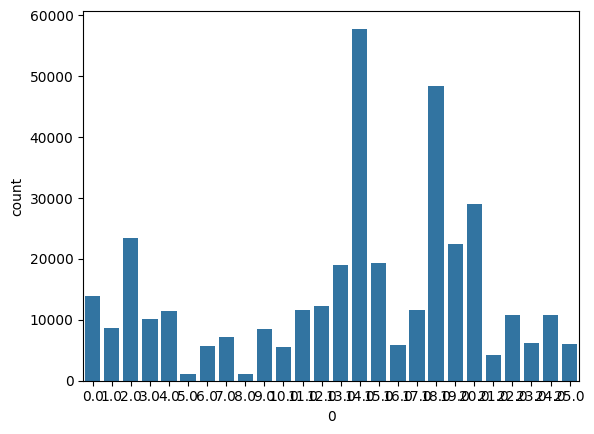

In [30]:
# sns.countplot(alphabet_labels);
sns.countplot(x=alphabet_labels)

## Joining the datasets

In [31]:
digits_labels, np.unique(digits_labels)

(array([5, 0, 4, ..., 4, 5, 6], dtype=uint8),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))

In [32]:
alphabet_labels, np.unique(alphabet_labels)

(0          0.0
 1          0.0
 2          0.0
 3          0.0
 4          0.0
           ... 
 372445    25.0
 372446    25.0
 372447    25.0
 372448    25.0
 372449    25.0
 Name: 0, Length: 372450, dtype: float32,
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.],
       dtype=float32))

In [33]:
alphabet_labels += 10

In [34]:
alphabet_labels, np.unique(alphabet_labels)

(0         10.0
 1         10.0
 2         10.0
 3         10.0
 4         10.0
           ... 
 372445    35.0
 372446    35.0
 372447    35.0
 372448    35.0
 372449    35.0
 Name: 0, Length: 372450, dtype: float32,
 array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.,
        23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35.],
       dtype=float32))

In [35]:
data = np.vstack([alphabet_data, digits_data])
labels = np.hstack([alphabet_labels, digits_labels])

In [36]:
data.shape, labels.shape

((442450, 28, 28), (442450,))

In [37]:
np.unique(labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35.], dtype=float32)

In [38]:
data = np.array(data, dtype = 'float32')

In [39]:
data = np.expand_dims(data, axis = -1)

In [40]:
data.shape

(442450, 28, 28, 1)

# Pre-processing the data

In [41]:
data[0].min(), data[0].max()

(0.0, 255.0)

In [42]:
data /= 255.0

In [43]:
data[0].min(), data[0].max()

(0.0, 1.0)

In [44]:
np.unique(labels), len(np.unique(labels)) # softmax

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35.], dtype=float32),
 36)

In [45]:
le = LabelBinarizer()
labels = le.fit_transform(labels)

In [46]:
np.unique(labels)

array([0, 1])

In [47]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [48]:
labels[0], len(labels[0])

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 36)

In [49]:
labels[30000]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [50]:
# OneHotEncoder
# A, B, C
# 0, 1, 2

# A, B, C
# 1, 0, 0
# 0, 1, 0
# 0, 0, 1

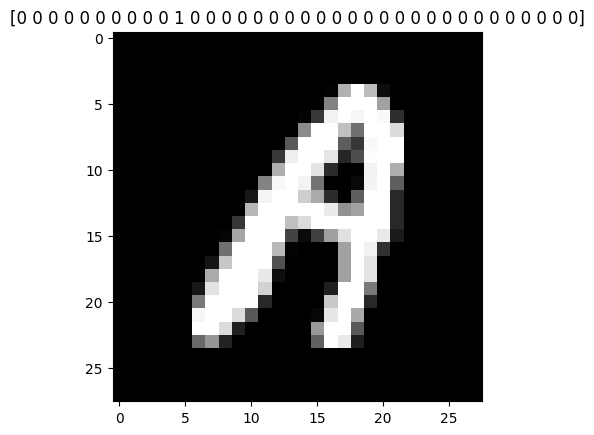

In [51]:
plt.imshow(data[0].reshape(28,28), cmap='gray')
plt.title(str(labels[0]));

In [52]:
classes_total = labels.sum(axis = 0)
classes_total

array([ 6903,  7877,  6990,  7141,  6824,  6313,  6876,  7293,  6825,
        6958, 13869,  8668, 23409, 10134, 11440,  1163,  5762,  7218,
        1120,  8493,  5603, 11586, 12336, 19010, 57825, 19341,  5812,
       11566, 48419, 22495, 29008,  4182, 10784,  6272, 10859,  6076])

In [53]:
classes_total.max()

57825

In [54]:
57825 / 6903

8.376792698826597

In [55]:
classes_weights = {}
for i in range(0, len(classes_total)):
  #print(i)
  classes_weights[i] = classes_total.max() / classes_total[i]

In [56]:
classes_weights

{0: 8.376792698826597,
 1: 7.340992763742541,
 2: 8.272532188841202,
 3: 8.097605377398123,
 4: 8.473769050410317,
 5: 9.15967052114684,
 6: 8.409685863874346,
 7: 7.928835870012341,
 8: 8.472527472527473,
 9: 8.310577752227651,
 10: 4.169370538611291,
 11: 6.671089063221043,
 12: 2.4702037677816224,
 13: 5.7060390763765545,
 14: 5.0546328671328675,
 15: 49.72055030094583,
 16: 10.035577924331829,
 17: 8.011221945137157,
 18: 51.629464285714285,
 19: 6.808548216178029,
 20: 10.320364090665715,
 21: 4.990937338166753,
 22: 4.6875,
 23: 3.0418200946870066,
 24: 1.0,
 25: 2.989762680316426,
 26: 9.94924294562973,
 27: 4.999567698426422,
 28: 1.1942625828703608,
 29: 2.5705712380529007,
 30: 1.993415609487038,
 31: 13.827116212338593,
 32: 5.362110534124629,
 33: 9.21954719387755,
 34: 5.3250759738465785,
 35: 9.51695194206715}

In [57]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 1, stratify = labels)

In [58]:
X_train.shape, X_test.shape

((353960, 28, 28, 1), (88490, 28, 28, 1))

In [59]:
y_train.shape, y_test.shape

((353960, 36), (88490, 36))

In [60]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [61]:
augmentation = ImageDataGenerator(rotation_range = 10, zoom_range=0.05, width_shift_range=0.1,
                                  height_shift_range=0.1, horizontal_flip = False)

# Buiding the neural network

- Padding: https://www.pico.net/kb/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-tensorflow

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint

In [63]:
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense

network = Sequential()

# 1. Start with an explicit Input object
network.add(Input(shape=(28, 28, 1)))

# 2. Add your layers without the input_shape argument
network.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same')) #or 'valid"
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Flatten())

network.add(Dense(64, activation='relu'))
network.add(Dense(128, activation='relu'))
network.add(Dense(36, activation='softmax'))

network.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [64]:
3 * 3 * 128

1152

In [65]:
network.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 6, 6, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 36)             │         4,644 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 179,428 (700.89 KB)

 Trainable params: 179,428 (700.89 KB)

 Non-trainable params: 0 (0.00 B)

In [66]:
name_labels = '0123456789'
name_labels += 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
name_labels = [l for l in name_labels]

In [67]:
print(name_labels)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


# Training the neural network

In [68]:
file_model = 'custom_ocr.keras'
epochs = 20
batch_size = 64

In [69]:
checkpointer = ModelCheckpoint(file_model, monitor = 'val_loss', verbose = 1, save_best_only=True)

In [70]:
len(X_train) // batch_size

5530

In [71]:
history = network.fit(augmentation.flow(X_train, y_train, batch_size=batch_size),
                      validation_data = (X_test, y_test),
                      steps_per_epoch = len(X_train) // batch_size, epochs=epochs,
                      class_weight = classes_weights, verbose=1, callbacks=[checkpointer])

Epoch 1/20
5524/5530 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7489 - loss: 3.4948
Epoch 1: val_loss improved from None to 0.18849, saving model to custom_ocr.keras

Epoch 1: finished saving model to custom_ocr.keras
5530/5530 ━━━━━━━━━━━━━━━━━━━━ 49s 9ms/step - accuracy: 0.8466 - loss: 1.8156 - val_accuracy: 0.9360 - val_loss: 0.1885
Epoch 2/20
   1/5530 ━━━━━━━━━━━━━━━━━━━━ 45s 8ms/step - accuracy: 0.8906 - loss: 1.5033

/home/aispark/Project/OCR_Project/.venv/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_loss improved from 0.18849 to 0.18374, saving model to custom_ocr.keras

Epoch 2: finished saving model to custom_ocr.keras
5530/5530 ━━━━━━━━━━━━━━━━━━━━ 5s 853us/step - accuracy: 0.8906 - loss: 1.5033 - val_accuracy: 0.9379 - val_loss: 0.1837
Epoch 3/20
5529/5530 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9027 - loss: 0.9470
Epoch 3: val_loss improved from 0.18374 to 0.17307, saving model to custom_ocr.keras

Epoch 3: finished saving model to custom_ocr.keras
5530/5530 ━━━━━━━━━━━━━━━━━━━━ 49s 9ms/step - accuracy: 0.9073 - loss: 0.8853 - val_accuracy: 0.9315 - val_loss: 0.1731
Epoch 4/20
   1/5530 ━━━━━━━━━━━━━━━━━━━━ 52s 10ms/step - accuracy: 0.9375 - loss: 0.3639
Epoch 4: val_loss did not improve from 0.17307
5530/5530 ━━━━━━━━━━━━━━━━━━━━ 4s 663us/step - accuracy: 0.9375 - loss: 0.3639 - val_accuracy: 0.9300 - val_loss: 0.1755
Epoch 5/20
5528/5530 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9155 - loss: 0.7726
Epoch 5: val_loss did not improve from 0.17307
553

# Evaluating the neural network

In [72]:
X_test.shape

(88490, 28, 28, 1)

In [73]:
predictions = network.predict(X_test, batch_size=batch_size)

1383/1383 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


In [74]:
predictions

array([[5.76314211e-01, 1.10165788e-08, 4.66161600e-06, ...,
        4.49417370e-12, 1.17199431e-06, 9.06978130e-07],
       [2.74636258e-10, 3.55511361e-07, 6.22271390e-09, ...,
        4.56950949e-10, 2.07190027e-07, 1.65236804e-06],
       [1.96523752e-11, 3.34586825e-09, 1.04546365e-10, ...,
        1.34030795e-08, 6.85859121e-08, 1.66795093e-12],
       ...,
       [6.98350132e-01, 6.11639139e-09, 2.58105183e-06, ...,
        1.63122554e-14, 1.24133052e-07, 3.73502793e-08],
       [5.20804234e-23, 3.06741049e-10, 2.28421726e-08, ...,
        9.99939561e-01, 2.27604369e-06, 1.13712061e-10],
       [4.37375053e-10, 4.30347305e-20, 3.78735203e-11, ...,
        5.89567424e-20, 9.91504882e-12, 5.39836897e-10]], dtype=float32)

In [75]:
predictions[0]

array([5.7631421e-01, 1.1016579e-08, 4.6616160e-06, 3.5197825e-08,
       1.3112102e-06, 3.3255088e-05, 2.6016170e-04, 5.9154750e-08,
       4.3202894e-05, 3.7614303e-05, 7.0172482e-06, 4.0405168e-05,
       7.5874006e-04, 1.9008114e-03, 6.6749994e-06, 2.6151986e-10,
       9.3348161e-04, 1.9644373e-09, 1.3101011e-12, 2.2308426e-05,
       5.0120292e-07, 2.7254922e-07, 1.7062916e-07, 1.6582531e-05,
       4.0435353e-01, 9.6937496e-05, 1.5026741e-02, 5.5427023e-07,
       2.0459282e-05, 3.4523902e-07, 1.1786738e-04, 1.3807762e-09,
       4.9560640e-08, 4.4941737e-12, 1.1719943e-06, 9.0697813e-07],
      dtype=float32)

In [76]:
len(predictions[0])

36

In [77]:
np.argmax(predictions[0])

0

In [78]:
name_labels[24]

'O'

In [79]:
y_test[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [80]:
np.argmax(y_test[0])

24

In [81]:
name_labels[np.argmax(y_test[0])]

'O'

In [82]:
network.evaluate(X_test, y_test)

2766/2766 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8777 - loss: 0.2686


[0.2686280906200409, 0.877714991569519]

In [83]:
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names = name_labels))

              precision    recall  f1-score   support

           0       0.16      0.97      0.27      1381
           1       0.98      0.98      0.98      1575
           2       0.86      0.99      0.92      1398
           3       0.97      0.98      0.98      1428
           4       0.85      0.97      0.90      1365
           5       0.42      0.97      0.58      1263
           6       0.92      0.99      0.95      1375
           7       0.97      0.99      0.98      1459
           8       0.91      0.99      0.95      1365
           9       0.92      0.99      0.95      1392
           A       0.99      0.98      0.99      2774
           B       0.99      0.98      0.98      1734
           C       0.99      0.98      0.98      4682
           D       0.95      0.95      0.95      2027
           E       0.99      0.98      0.99      2288
           F       0.97      0.99      0.98       233
           G       0.95      0.93      0.94      1152
           H       0.99    

In [84]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

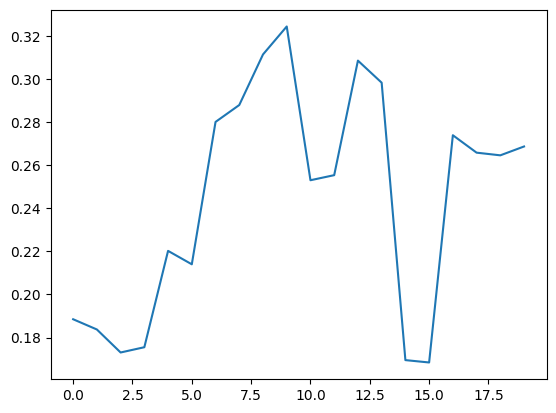

In [85]:
plt.plot(history.history['val_loss']);

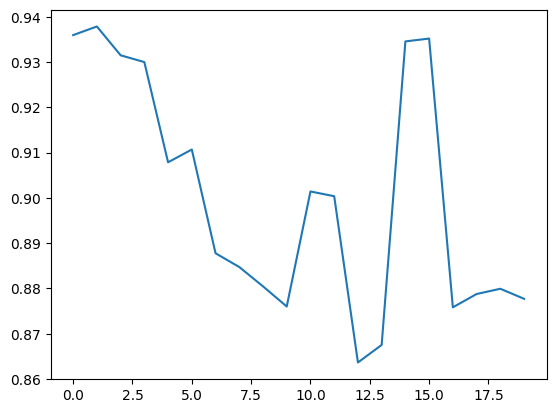

In [86]:
plt.plot(history.history['val_accuracy']);

# Saving the neural network on Google Drive

In [89]:
network.save('network.keras')

# Testing the neural network with images

In [91]:
from tensorflow.keras.models import load_model

In [116]:

loaded_network = load_model('network.keras', compile=False)

In [117]:
loaded_network

<Sequential name=sequential, built=True>

In [118]:
loaded_network.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 6, 6, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 36)             │         4,644 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 179,428 (700.89 KB)

 Trainable params: 179,428 (700.89 KB)

 Non-trainable params: 0 (0.00 B)

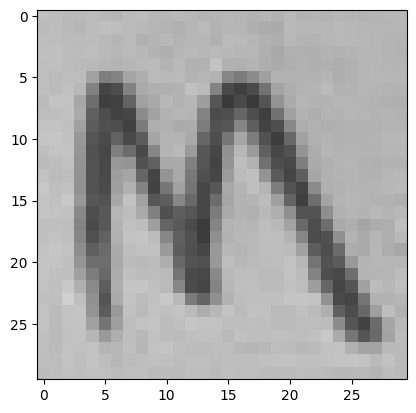

In [119]:
import cv2
img = cv2.imread('Images/letter-m.jpg')
plt.imshow(img)

In [120]:
img.shape

(30, 30, 3)

In [121]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(30, 30)

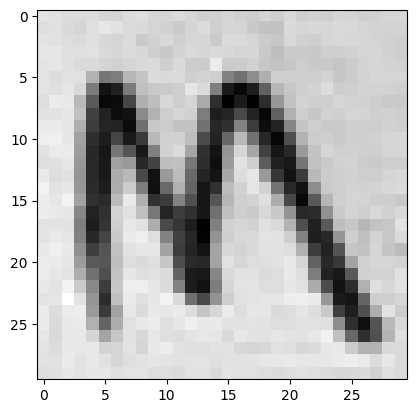

In [122]:
plt.imshow(gray, cmap="gray")

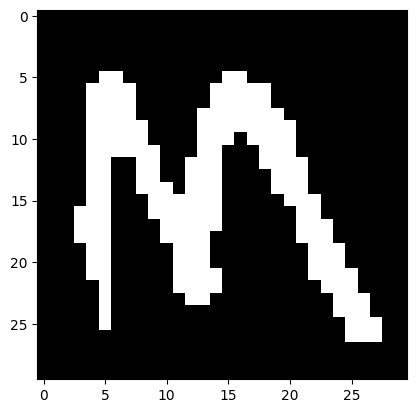

In [123]:
value, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
plt.imshow(thresh, cmap='gray')

In [124]:
value

137.0

In [125]:
thresh.shape

(30, 30)

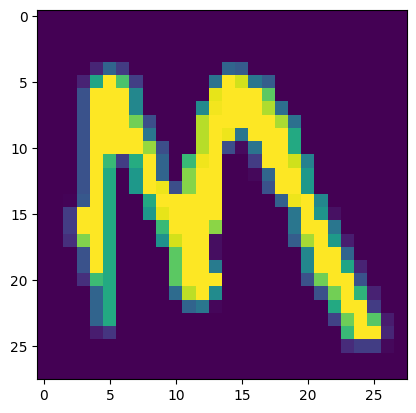

In [126]:
img = cv2.resize(thresh, (28,28))
plt.imshow(img)

In [127]:
img.shape

(28, 28)

In [128]:
img = img.astype('float32') / 255.0
img = np.expand_dims(img, axis = -1)
img.shape

(28, 28, 1)

In [129]:
img = np.reshape(img, (1,28,28,1))
img.shape

(1, 28, 28, 1)

In [130]:
prediction = loaded_network.predict(img)
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[1.9857320e-14, 1.4982881e-08, 1.7408210e-12, 3.0108322e-11,
        3.9985068e-08, 5.3633365e-11, 4.3202005e-16, 5.3043490e-08,
        2.6121657e-12, 2.1358674e-07, 6.7626552e-06, 6.9811961e-14,
        4.3109041e-10, 3.1814807e-07, 7.0193601e-13, 3.2985891e-18,
        1.2480708e-08, 1.1532865e-08, 4.1296971e-13, 3.3590231e-12,
        4.6925496e-08, 1.2759946e-12, 9.9964499e-01, 3.4547527e-04,
        1.7354034e-09, 1.4593197e-13, 3.6418321e-13, 1.8288263e-06,
        1.6418049e-07, 2.4547910e-09, 1.3054820e-08, 1.2662287e-20,
        1.0721411e-08, 4.7233297e-09, 1.0777174e-09, 1.2413828e-12]],
      dtype=float32)

In [131]:
np.argmax(prediction)

22

In [132]:
name_labels[np.argmax(prediction)]

'M'